<a href="https://colab.research.google.com/github/Pratik-Prabhakarrao/Time-Series/blob/main/S%26P_500_Time_series_forcasting_with_FB_Propht.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pratikprabhakarrao","key":"ef2cc8a1efa5cc0b5fe26dd0f5c61675"}'}

In [5]:
# create kaggle directory

! mkdir ~/.kaggle/

In [6]:
# copy the kaggle.jsone to the folder created i.e kaggle

! cp kaggle.json ~/.kaggle/

In [7]:
# permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
# pest the link of data from the data required

! kaggle datasets download -d camnugent/sandp500

 47% 9.00M/19.3M [00:00<00:00, 63.0MB/s]
100% 19.3M/19.3M [00:00<00:00, 93.9MB/s]


In [11]:
# Import Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from fbprophet import Prophet
# Statsmodels widely known for forecasting than Prophet
import statsmodels.api as sm
from scipy import stats
from plotly import tools
import plotly as py
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# plt.style.available
plt.style.use("seaborn-whitegrid")

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
# locate the file in gooogle drive

path = 'drive/My Drive/DATASETS/S & P 500/'

In [17]:
# import the datasets

df = pd.read_csv(path+'/all_stocks_5yr.csv')

In [18]:
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [19]:
# Brief Description of our dataset
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [20]:
# Replace the column name from name to ticks
df = df.rename(columns={'Name': 'Ticks'})

In [21]:
# For this simple tutorial we will analyze Amazon's stock and see what will the trend look like for the nearby future of this stock relying on past stock prices.

# Let's analyze some of the stocks.
amzn = df.loc[df['Ticks'] == 'AMZN']
amzn.head()

,date,open,high,low,close,volume,Ticks
46387,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
46388,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
46389,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
46390,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
46391,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [ ]:
# We need to make sure if the date column is either a categorical type or a datetype. In our case date is a categorical datatype so we need to change it to datetime.

In [22]:
amzn.info() # Check whether the date is as object type or date type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 46387 to 47645
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Ticks   1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 78.7+ KB


In [23]:
#  Change to dateformat
amzn.head()

,date,open,high,low,close,volume,Ticks
46387,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
46388,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
46389,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
46390,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
46391,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [25]:
# Create a copy to avoid the SettingWarning .loc issue 
amzn_df = amzn.copy()
# Change to datetime datatype.
amzn_df.loc[:, 'date'] = pd.to_datetime(amzn.loc[:,'date'], format="%Y/%m/%d")

In [26]:
amzn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 46387 to 47645
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   open    1259 non-null   float64       
 2   high    1259 non-null   float64       
 3   low     1259 non-null   float64       
 4   close   1259 non-null   float64       
 5   volume  1259 non-null   int64         
 6   Ticks   1259 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 78.7+ KB


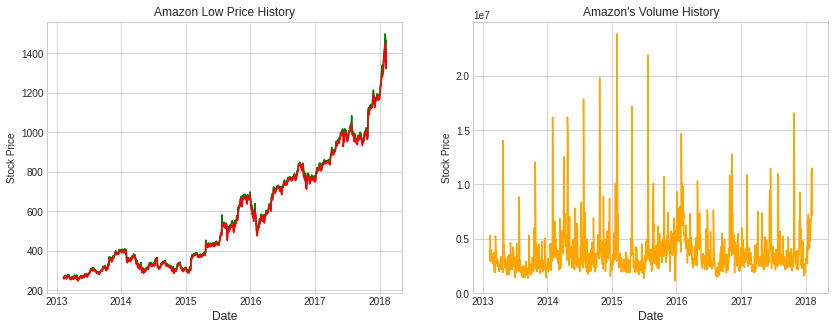

In [27]:
# Simple plotting of Amazon Stock Price
# First Subplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(amzn_df["date"], amzn_df["close"])
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Amazon Close Price History")

# Second Subplot
ax1.plot(amzn_df["date"], amzn_df["high"], color="green")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Amazon High Price History")

# Third Subplot
ax1.plot(amzn_df["date"], amzn_df["low"], color="red")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Amazon Low Price History")

# Fourth Subplot
ax2.plot(amzn_df["date"], amzn_df["volume"], color="orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Stock Price")
ax2.set_title("Amazon's Volume History")
plt.show()

In [28]:
m = Prophet()

# Drop the columns
ph_df = amzn_df.drop(['open', 'high', 'low','volume', 'Ticks'], axis=1)
ph_df.rename(columns={'close': 'y', 'date': 'ds'}, inplace=True)

ph_df.head()

,ds,y
46387,2013-02-08,261.95
46388,2013-02-11,257.21
46389,2013-02-12,258.70
46390,2013-02-13,269.47
46391,2013-02-14,269.24


In [29]:
m = Prophet()

m.fit(ph_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
# Create Future dates
future_prices = m.make_future_dataframe(periods=365)

# Predict Prices
forecast = m.predict(future_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1619,2019-02-03,1827.766988,1050.323058,2580.535705
1620,2019-02-04,1802.837570,1018.042887,2558.315345
1621,2019-02-05,1803.333947,1013.817050,2575.797186
1622,2019-02-06,1803.656174,1007.286129,2572.002147
1623,2019-02-07,1803.714671,1015.764076,2573.733490


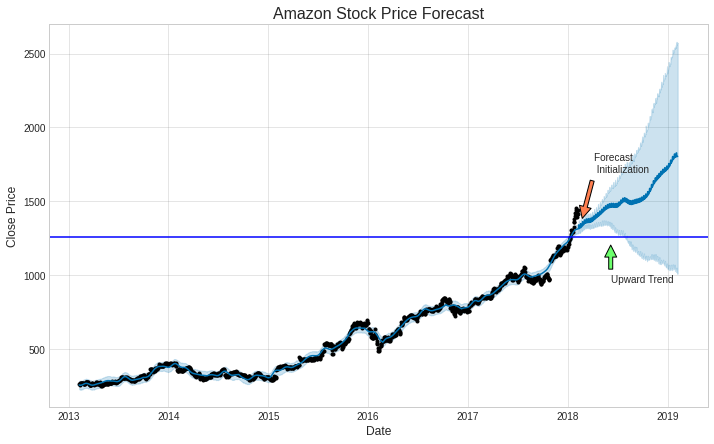

In [31]:
import matplotlib.dates as mdates

# Dates
starting_date = dt.datetime(2018, 4, 7)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2018, 6, 7)
trend_date1 = mdates.date2num(trend_date)

pointing_arrow = dt.datetime(2018, 2, 18)
pointing_arrow1 = mdates.date2num(pointing_arrow)

# Learn more Prophet tomorrow and plot the forecast for amazon.
fig = m.plot(forecast)
ax1 = fig.add_subplot(111)
ax1.set_title("Amazon Stock Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)

# Forecast initialization arrow
ax1.annotate('Forecast \n Initialization', xy=(pointing_arrow1, 1350), xytext=(starting_date1,1700),
            arrowprops=dict(facecolor='#ff7f50', shrink=0.1),
            )

# Trend emphasis arrow
ax1.annotate('Upward Trend', xy=(trend_date1, 1225), xytext=(trend_date1,950),
            arrowprops=dict(facecolor='#6cff6c', shrink=0.1),
            )

ax1.axhline(y=1260, color='b', linestyle='-')

plt.show()

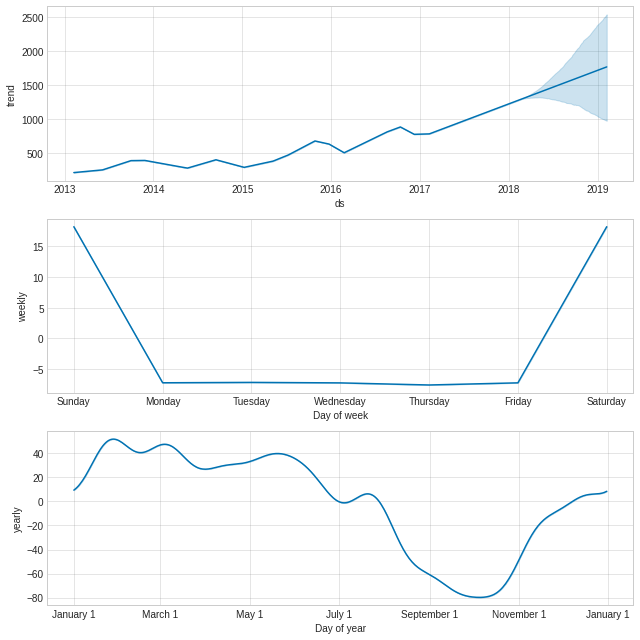

In [32]:
fig2 = m.plot_components(forecast)
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


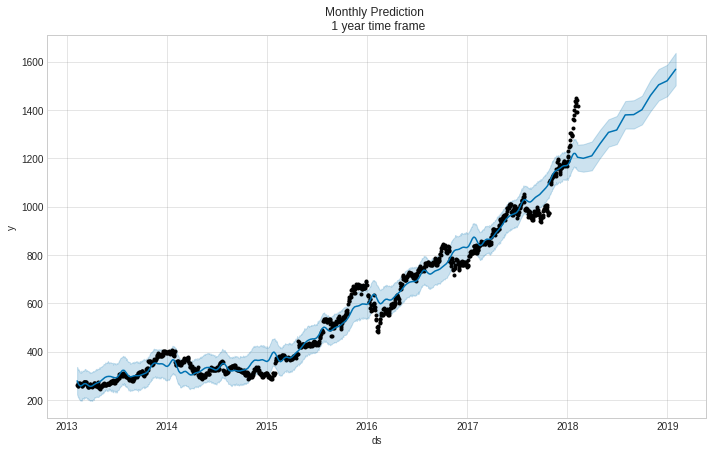

In [33]:
# Monthly Data Predictions
m = Prophet(changepoint_prior_scale=0.01).fit(ph_df)
future = m.make_future_dataframe(periods=12, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
plt.title("Monthly Prediction \n 1 year time frame")

plt.show()

Trends:

Amazon's stock price is showing signs of upper trend yearly.
Amazon's stock price show upper trend signs during January (December Sales tend to give a boost to Amazon's stock price)
There is no weekly trend for stock price

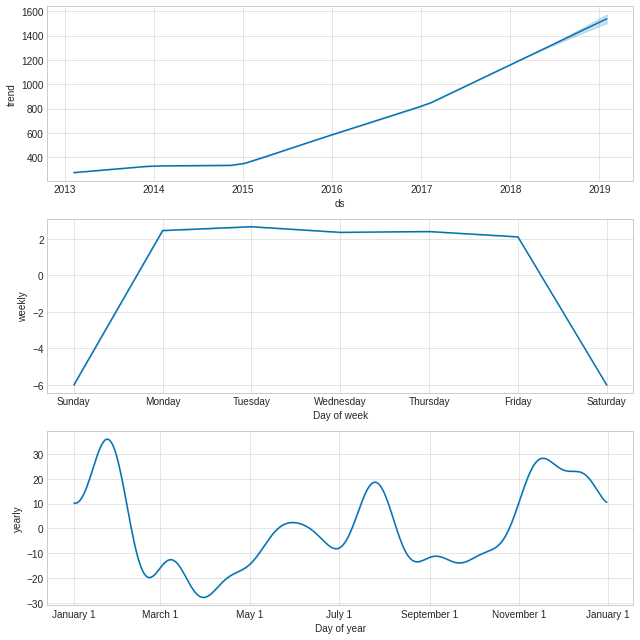

In [34]:
fig = m.plot_components(fcst)
plt.show()

In [39]:
trace = go.Ohlc(x=amzn_df['date'],
                open=amzn_df['open'],
                high=amzn_df['high'],
                low=amzn_df['low'],
                close=amzn_df['close'],
               increasing=dict(line=dict(color= '#58FA58')),
                decreasing=dict(line=dict(color= '#FA5858')))

layout = {
    'title': 'Amazon Historical Price',
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price (USD$)'},
    'shapes': [{
        'x0': '2016-12-09', 'x1': '2016-12-09',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    }],
    'annotations': [{
        'x': '2017-01-20', 'y': 0.05, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': 'President Donald Trump <br> takes Office'
    }]
}

data = [trace]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='simple_ohlc')


In [40]:
last_two = amzn_df.loc[amzn_df['date'].dt.year > 2016]

g = last_two.groupby(["date"])
monthly_averages = g.aggregate({"open": np.mean, "high": np.mean, "low": np.mean, "close":np.mean})
monthly_averages.reset_index(level=0, inplace=True)

trace = go.Candlestick(x=monthly_averages['date'],
                       open=monthly_averages['open'].values.tolist(),
                       high=monthly_averages['high'].values.tolist(),
                       low=monthly_averages['low'].values.tolist(),
                       close=monthly_averages['close'].values.tolist(),
                      increasing=dict(line=dict(color= '#58FA58')),
                decreasing=dict(line=dict(color= '#FA5858')))

layout = {
    'title': 'Amazon Historical Price <br> <i>For the Last two years </i>',
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price (USD$)'},
    'shapes': [{
        'x0': '2018-01-02', 'x1': '2018-01-02',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    }],
    'annotations': [{
        'x': '2018-01-07', 'y': 0.9, 'xref': 'x', 'yref': 'paper',
        'showarrow': True, 'xanchor': 'left',
        'text': 'Upward Trend'
    }]
}


data = [trace]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='simple_ohlc')

In [43]:
amzn_df['month_year'] = pd.to_datetime(amzn_df['date']).dt.to_period('M')

# 2017 onwards
last_year = amzn_df.loc[amzn_df['date'].dt.year > 2017]
g = last_year.groupby(["date"])
monthly_averages = g.aggregate({"open": np.mean, "high": np.mean, "low": np.mean, "close":np.mean})
monthly_averages.reset_index(level=0, inplace=True)

monthly_averages.dtypes


trace = go.Candlestick(x=monthly_averages['date'],
                       open=monthly_averages['open'].values.tolist(),
                       high=monthly_averages['high'].values.tolist(),
                       low=monthly_averages['low'].values.tolist(),
                       close=monthly_averages['close'].values.tolist(),
                      increasing=dict(line=dict(color= '#58FA58')),
                decreasing=dict(line=dict(color= '#FA5858')))


layout = {
    'title': 'Amazon Historical Price <br> <i>A closer look to the upward trend </i>',
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price (USD$)'}
}


data = [trace]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='simple_ohlc')

In [44]:
amzn_df.head()

,date,open,high,low,close,volume,Ticks,month_year
46387,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,2013-02
46388,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,2013-02
46389,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,2013-02
46390,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,2013-02
46391,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,2013-02


In [45]:
# Moving Averages (10, 50 and 200)
amzn_df['10_d_avg'] = amzn_df.close.rolling(window=10).mean()
amzn_df['50_d_avg'] = amzn_df.close.rolling(window=50).mean()
amzn_df['200_d_avg'] = amzn_df.close.rolling(window=200).mean()
close_p = amzn_df['close'].values.tolist()


# Variables to insert into plotly
ten_d = amzn_df['10_d_avg'].values.tolist()
fifty_d = amzn_df['50_d_avg'].values.tolist()
twoh_d = amzn_df['200_d_avg'].values.tolist()
date = amzn_df['date'].values.tolist()

# Set date as index
amzn_df = amzn_df.set_index('date')

In [46]:
fig = tls.make_subplots(rows=2, cols=1, shared_xaxes=True)

colors = ['#ff4500', '#92a1cf', '#6E6E6E']
avgs = ['10_d_avg', '50_d_avg', '200_d_avg']
# for i,c in zip(range(n),color):
#    ax1.plot(x, y,c=c)

for col, c in zip(avgs, colors):
    fig.append_trace({'x': amzn_df.index, 'y': amzn_df[col], 'type': 'scatter', 'name': col, 'line': {'color': c}}, 1, 1)
for col in ['close']:
    fig.append_trace({'x': amzn_df.index, 'y': amzn_df[col], 'type': 'scatter', 'name': 'Closing Price', 'line':{'color': '#01DF3A'}}, 2, 1)
    
fig['layout'].update(height=800,title='Relationship between MAs <br> and Closing Price',
                    paper_bgcolor='#F2DFCE', plot_bgcolor='#F2DFCE')
    
iplot(fig, filename='pandas/mixed-type subplots')

In [47]:
# Take off the date index
amzn_df = amzn_df.reset_index()

# Plotly
trace0 = go.Scatter(
    x = amzn_df['date'],
    y = ten_d,
    name = '10-day MA',
    line = dict(
        color = ('#ff6347'),
        width = 4)
)
trace1 = go.Scatter(
    x = amzn_df['date'],
    y = fifty_d,
    name = '50-day MA',
    line = dict(
        color = ('#92a1cf'),
        width = 4,
    dash="dot")
)
trace2 = go.Scatter(
    x = amzn_df['date'],
    y = twoh_d,
    name = '200-day MA',
    line = dict(
        color = ('#2EF688'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)

data = [trace0, trace1, trace2]


# Edit the layout
layout = dict(title = 'Moving Averages for Amazon',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price'),
              annotations=[
        dict(
            x='2016-01-13',
            y=657,
            xref='x',
            yref='y',
            text='<i> First major decline <br> after 10-d crosses <br> 50-d moving average </i>',
            showarrow=True,
            arrowhead=5,
            ax=5,
            ay=-50
        ), dict(
        x = "2016-02-24",
        y = 535,
        text = "<i>Upward trend after <br> 10-day crosses <br>200-day moving average </i>",
        textangle = 0,
        ax = 50,
        ay = 50,
        font = dict(
          color = "black",
          size = 12
        )
        )],
              paper_bgcolor='#FFF9F5',
              plot_bgcolor='#FFF9F5'
              )

fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-line')